In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt
import joblib
import os
import cv2

In [2]:
def saveVariable(x, keyName):
    tmp = str(keyName) + ".sav"
    joblib.dump(x, tmp)
    
def loadVariable(keyName):
    tmp = str(keyName) + ".sav"
    return joblib.load(tmp)


def isEmptyFile(keyName):
    tmp = str(keyName) +".p"
    if os.path.exists(tmp) == False:
        return True
    if os.path.getsize(tmp) == 0:
        return True
    return False

In [3]:
path2 = os.path.dirname(os.path.realpath("__file__")) + '\\state-farm-distracted-driver-detection\\imgs\\train\\c0\\img_100026.jpg'
path = os.path.dirname(os.path.realpath("__file__")) + '\\state-farm-distracted-driver-detection\\imgs\\train\\'
#cTotal = list()

In [4]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
c7 = []
c8 = []
c9 = []



In [5]:
def processingImg(path):
    listLabels = os.listdir(path)
    #listImg = list()
    #print(listLabels)
    #counter = 0
    # listLabels = listLabels[0]
    for x in listLabels:
        newPath = path + x + "\\"
        imgLabel = os.listdir(newPath)
        print(x)
        for y in imgLabel:
            grayPath = newPath + y
            grayImg = cv2.imread(grayPath, 0).astype("float32")
            row, column = (60, 60)
            #row, column = int(grayImg.shape[0]/4), int(grayImg.shape[1]/4)
            grayImg = cv2.resize(grayImg, (column, row))
            grayImg = grayImg.reshape(1,column*row)
            
            
            #grayImg = normalizeImgV(grayImg)
            #grayImg = grayImg.tolist()
            grayImg = grayImg/255
            #grayImg = (int(x[-1]), grayImg)
            if x == "c0":
                c0.append(grayImg)
            elif x == "c1":
                c1.append(grayImg)
            elif x == "c2":
                c2.append(grayImg)
            elif x == "c3":
                c3.append(grayImg)
            elif x == "c4":
                c4.append(grayImg)
            elif x == "c5":
                c5.append(grayImg)
            elif x == "c6":
                c6.append(grayImg)
            elif x == "c7":
                c7.append(grayImg)
            elif x == "c8":
                c8.append(grayImg)
            elif x == "c9":
                c9.append(grayImg)
processingImg(path)

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9


In [ ]:
t = np.random.random_integers(0, 17000,4000)
for x in t:
    cTotal.pop(x)

In [ ]:
np.average([[2,3,4], [8,6,1]], axis=0)

In [8]:
saveVariable(c0, "QDAC0")
saveVariable(c1, "QDAC1")
saveVariable(c2, "QDAC2")
saveVariable(c3, "QDAC3")
saveVariable(c4, "QDAC4")
saveVariable(c5, "QDAC5")
saveVariable(c6, "QDAC6")
saveVariable(c7, "QDAC7")
saveVariable(c8, "QDAC8")
saveVariable(c9, "QDAC9")

In [6]:
c0Avg = np.average(c0, axis=0)
c1Avg = np.average(c1, axis=0)
c2Avg = np.average(c2, axis=0)
c3Avg = np.average(c3, axis=0)
c4Avg = np.average(c4, axis=0)
c5Avg = np.average(c5, axis=0)
c6Avg = np.average(c6, axis=0)
c7Avg = np.average(c7, axis=0)
c8Avg = np.average(c8, axis=0)
c9Avg = np.average(c9, axis=0)

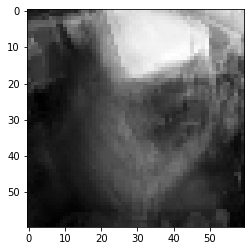

In [7]:
plt.imshow(c4Avg.reshape(60,60).astype("float32"), cmap="gray")

In [17]:
totalSummation = np.zeros([60*60,1])
for x in c0:
    tmp = x  - c0Avg
    tmp = tmp.reshape(60*60,1)
    #print(tmp)
    summation = tmp.dot(tmp.T)
    #print(tmp.reshape(4,1))
    totalSummation = totalSummation + summation
sigmaC0 = totalSummation/3600

KeyboardInterrupt: 

In [ ]:
sigmaC0.shape

In [ ]:
def randomizeData(cTotal):
    random.shuffle(cTotal)
    return cTotal

def parsingData(cTotal):
    yTrain = [x for x, y in cTotal]
    xTrain = [y for x, y in cTotal]
    #xTrain = np.array(xTrain, dtype="uint8")
    #yTrain = np.array(yTrain, dtype="uint8")
    #print(len(xTrain[0]))
    #xTrain = np.array(xTrain, dtype="float32")
    xTrain = np.array(xTrain, dtype="float16")
    yTrain = np.array(yTrain, dtype="uint8")
    return xTrain, yTrain

In [ ]:
#randomizeData(cTotal)
xTrain, yTrain = parsingData(cTotal)

In [ ]:
for z in yTrain:
    if z == 

In [ ]:
xTest = xTrain[int(len(xTrain)*0.9):]
yTest = yTrain[int(len(xTrain)*0.9):]
xTrain = xTrain[:int(len(xTrain)*0.9)]
yTrain = yTrain[:int(len(yTrain)*0.9)]

In [ ]:
len(xTrain)

In [ ]:
len(xTest)

In [ ]:
xTrain = xTrain.reshape( len(xTrain), 120*160, 1)
xTest = xTest.reshape(len(xTest), 120*160, 1)